In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [27]:
df= pd.read_csv("fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [28]:
df.shape

(1296675, 23)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Conducting Exploratory data analysis
* Distribution by histogram 
* Correlation by heatmap

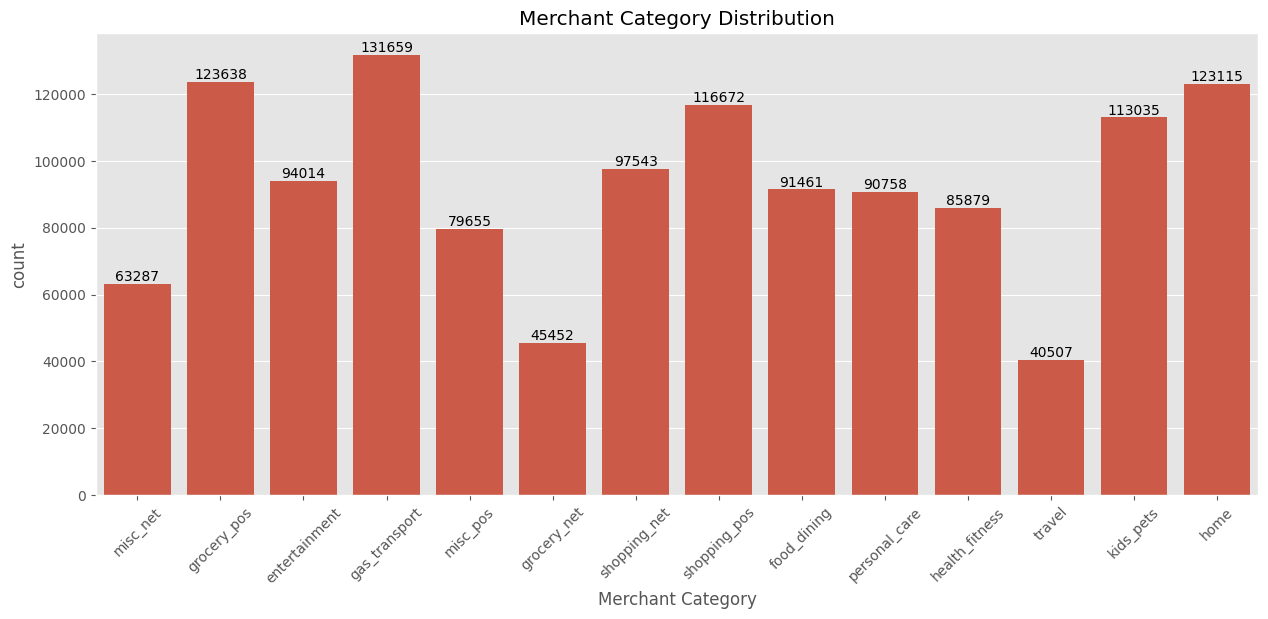

In [30]:
plt.figure(figsize=(15,6))
ax = sns.countplot(df, x='category')
plt.xticks(rotation = 45)
ax.set_title("Merchant Category Distribution")
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Merchant Category')
plt.show()

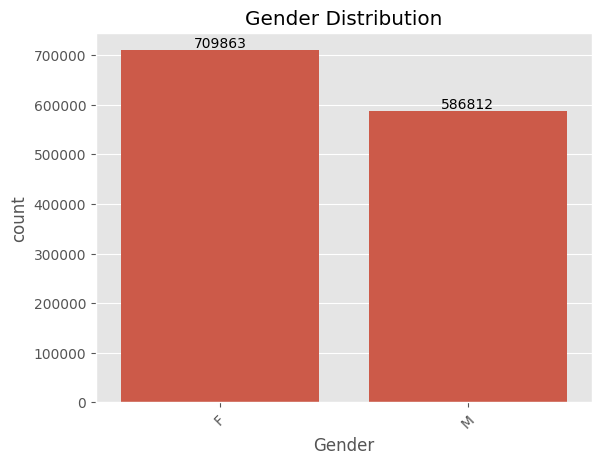

In [31]:
ax = sns.countplot(df, x='gender')
plt.xticks(rotation = 45)
ax.set_title("Gender Distribution")
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel("Gender")
plt.show()


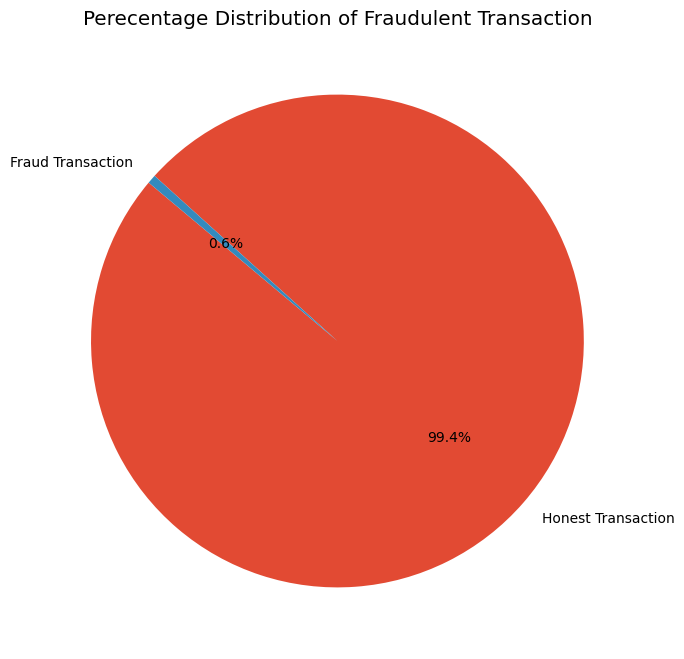

In [32]:
plt.figure(figsize=(8, 8))
F_count = df['is_fraud'].value_counts()
fraud_labels = {0: 'Honest Transaction', 1: 'Fraud Transaction'}
labels_for_plot = [fraud_labels[gen] for gen in F_count.index]
plt.pie(F_count, labels=labels_for_plot, autopct='%1.1f%%', startangle=140)
plt.title('Perecentage Distribution of Fraudulent Transaction')
plt.show()

In [35]:
#Type casting data
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])

In [36]:
df.isnull().sum().sum()

0

There are no null values in our dataset

In [37]:
df.duplicated().sum()

0

In [38]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [39]:
#renaming the coulumns
df = df.rename(columns= {'Unnamed: 0' : 'Unique_Index', 'trans_date_trans_time':'Trans_date', 'category':'M_category',
       'amt':'Amount', 'first':'First_name', 'last':'Last_name', 'street':'Street_add'})

In [40]:
#dropping unecessary coulumns 
df = df[[#'Unique_Index', 
    #'Trans_date', 
    'cc_num', #'merchant', 'M_category',
       'Amount', #'First_name', 'Last_name', 
       'gender', #'Street_add', 'city',
       #'state', 
       'zip', 'lat', 'long', 'city_pop', #'job', 
       #'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud']].copy()

In [41]:
df.columns

Index(['cc_num', 'Amount', 'gender', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [42]:
df.head()

,cc_num,Amount,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,F,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,F,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,M,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,M,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,M,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [43]:
#one hot encoding for gender 
gender = pd.get_dummies(df['gender'],drop_first=True).astype(int)

In [44]:
df. drop(['gender'],axis=1,inplace=True)

In [45]:
df = pd.concat([df,gender],axis=1)

In [46]:
df = df.rename(columns={"M":"Gender"})

In [47]:
df.head()

,cc_num,Amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,Gender
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1


In [48]:
df.loc[(df['Amount'] > 900) & (df['is_fraud'] == 1)]

,cc_num,Amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,Gender
4654,4613314721966,942.62,28611,35.9946,-81.7266,885,1325629275,35.765890,-81.951839,1,1
4727,4613314721966,1092.68,28611,35.9946,-81.7266,885,1325633397,36.981465,-80.767836,1,1
4740,4613314721966,1254.27,28611,35.9946,-81.7266,885,1325634096,36.105024,-80.963186,1,1
5559,341546199006537,966.11,99783,64.7556,-165.6723,145,1325689598,65.468863,-165.473127,1,1
5612,4922710831011201,1015.80,15665,40.3359,-79.6607,1472,1325692125,40.306614,-79.961163,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1294576,6564459919350820,965.05,53803,42.5545,-90.3508,1306,1371751960,42.956224,-90.024870,1,1
1295108,4986925034905735,1064.44,40336,37.6858,-83.9862,13061,1371767340,38.220812,-84.138702,1,0
1295255,3560725013359375,1063.03,79759,31.8599,-102.7413,23,1371770992,30.971658,-102.494584,1,0
1295399,3524574586339330,977.01,32960,27.6330,-80.4031,105638,1371776408,26.888686,-80.834389,1,0


In [49]:
df.groupby(pd.cut(df['Amount'], bins=range(0, 3000, 1000)))['is_fraud'].sum()
#There are no fraud values above the amount of 2000

/tmp/ipykernel_7358/2216380120.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Amount'], bins=range(0, 3000, 1000)))['is_fraud'].sum()


Amount
(0, 1000]       6557
(1000, 2000]     949
Name: is_fraud, dtype: int64

# Developing ML model

In [50]:
x = df[['cc_num', 'Amount', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'Gender']]
y = df['is_fraud']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state=101)

## Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [56]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [96]:
#Cheking prediction of the model 
prediction = logmodel.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
#Testing model accuracy
from sklearn.metrics import confusion_matrix

In [98]:
cf_matrix = confusion_matrix(y_test,prediction)
cf_matrix

array([[386764,      0],
       [  2239,      0]])

<function matplotlib.pyplot.show(close=None, block=None)>

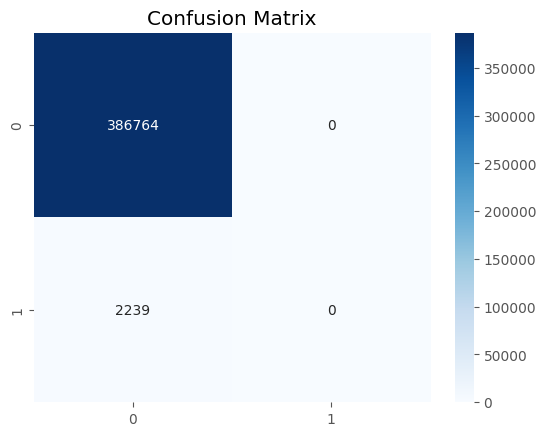

In [99]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,prediction))

/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386764
           1       0.00      0.00      0.00      2239

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9942442603270412

## Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()

In [106]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
#predicttion with decison tree model
prediction = dtmodel.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
#Testing the accuracy of the model 
from sklearn.metrics import confusion_matrix

In [109]:
cf_matrix = confusion_matrix(prediction,y_test)
print(cf_matrix)

[[385258   1236]
 [  1506   1003]]


<function matplotlib.pyplot.show(close=None, block=None)>

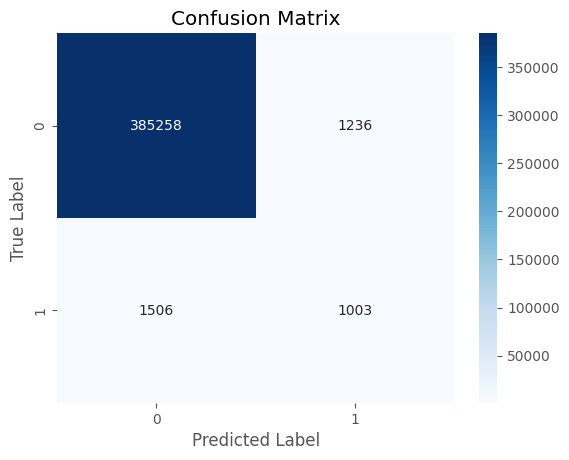

In [110]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show

In [111]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386764
           1       0.40      0.45      0.42      2239

    accuracy                           0.99    389003
   macro avg       0.70      0.72      0.71    389003
weighted avg       0.99      0.99      0.99    389003



In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,y_test)
accuracy

0.9931028809546456

## Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier()

In [76]:
rfclass.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
prediction = rfclass.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
#testing accuracy of the model
from sklearn.metrics import confusion_matrix

In [79]:
cf_matrix = confusion_matrix(prediction,y_test)
cf_matrix

array([[386540,   1219],
       [   224,   1020]])

<function matplotlib.pyplot.show(close=None, block=None)>

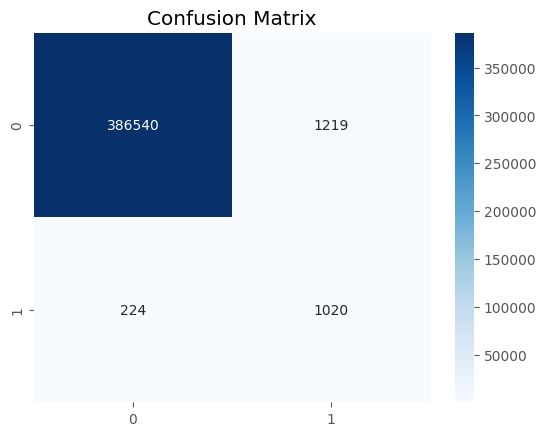

In [80]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386764
           1       0.82      0.46      0.59      2239

    accuracy                           1.00    389003
   macro avg       0.91      0.73      0.79    389003
weighted avg       1.00      1.00      1.00    389003



In [82]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,y_test)
accuracy

0.9962905170397144

## xgboost model

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost = GradientBoostingClassifier()

In [84]:
xgboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [85]:
prediction = xgboost.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
#Accuracy of the model
from sklearn.metrics import confusion_matrix

In [87]:
accuracy = confusion_matrix(prediction,y_test)
accuracy

array([[386446,   1648],
       [   318,    591]])

<function matplotlib.pyplot.show(close=None, block=None)>

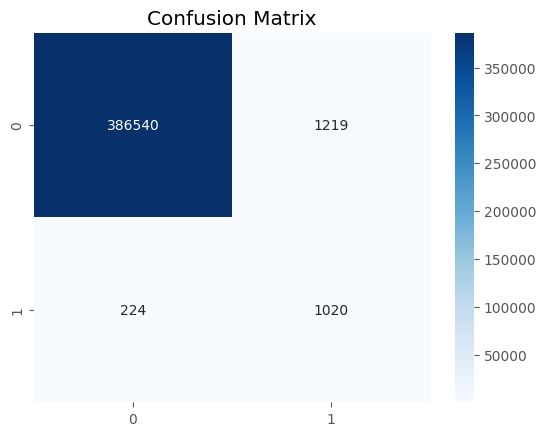

In [88]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386764
           1       0.65      0.26      0.38      2239

    accuracy                           0.99    389003
   macro avg       0.82      0.63      0.69    389003
weighted avg       0.99      0.99      0.99    389003



In [90]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,y_test)
accuracy

0.9949460544006087